In [41]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel



# **Task to pass with Grade 3:**

## 1. Data Processing

### Load and combine data

*   Load data from all three files
*   Combine the three datasets into a single unified dataset


### Combine

In [42]:
# Define the list of filenames
data = ["Trail1_extracted_features_acceleration_m1ai1-1.csv",
        "Trail2_extracted_features_acceleration_m1ai1.csv",
        "Trail3_extracted_features_acceleration_m2ai0.csv"]

# Initialize dataset
dataset = pd.DataFrame()

# Loop through each file and load it
for d in data:
    df = pd.read_csv(d)
    dataset = pd.concat([dataset, df], ignore_index=True)

In [43]:
dataset.head()

,mean,std,max,min,range,skewness,kurtosis,rms,crest_factor,variance,...,spectral_energy,spectral_centroid,spectral_bandwidth,spectral_flatness,start_time,event,axle,cluster,tsne_1,tsne_2
0,-0.000005,0.001350,0.007542,-0.006189,0.013731,-0.004788,0.472182,0.001350,5.587349,0.000002,...,7.037723e-08,1962.160093,2412.052659,0.274188,0.000000,normal,normal,NaN,NaN,NaN
1,-0.000006,0.024360,0.215148,-0.249093,0.464241,-0.036717,26.678484,0.024360,8.831983,0.000593,...,2.468464e-05,352.868951,257.055863,0.001911,2.886000,joint X,A1,NaN,NaN,NaN
2,0.000016,0.003036,0.013389,-0.014713,0.028103,-0.058478,0.208181,0.003036,4.409818,0.000009,...,3.563915e-07,681.251400,1274.187100,0.066875,3.385977,normal,normal,NaN,NaN,NaN
3,0.000067,0.024002,0.298642,-0.290638,0.589279,0.990779,39.908555,0.024002,12.442279,0.000576,...,2.348424e-05,263.747571,322.445494,0.002548,6.119000,squat A,A1,NaN,NaN,NaN
4,-0.000148,0.008061,0.024657,-0.042391,0.067048,-0.331677,1.217695,0.008062,3.058305,0.000065,...,2.240564e-06,244.161218,566.499799,0.011984,6.618984,normal,normal,NaN,NaN,NaN


### Remove the columns start_time, axle, cluster, tsne_1, and tsne_2 from the dataset.

In [44]:
dataset = dataset.drop(columns=["start_time",
                                "axle",
                                "cluster",
                                "tsne_1",
                                "tsne_2"
                                ])

In [45]:
dataset.head()

,mean,std,max,min,range,skewness,kurtosis,rms,crest_factor,variance,zero_crossings,dominant_freq,spectral_energy,spectral_centroid,spectral_bandwidth,spectral_flatness,event
0,-0.000005,0.001350,0.007542,-0.006189,0.013731,-0.004788,0.472182,0.001350,5.587349,0.000002,5798,475.0,7.037723e-08,1962.160093,2412.052659,0.274188,normal
1,-0.000006,0.024360,0.215148,-0.249093,0.464241,-0.036717,26.678484,0.024360,8.831983,0.000593,2809,375.0,2.468464e-05,352.868951,257.055863,0.001911,joint X
2,0.000016,0.003036,0.013389,-0.014713,0.028103,-0.058478,0.208181,0.003036,4.409818,0.000009,2598,475.0,3.563915e-07,681.251400,1274.187100,0.066875,normal
3,0.000067,0.024002,0.298642,-0.290638,0.589279,0.990779,39.908555,0.024002,12.442279,0.000576,1212,75.0,2.348424e-05,263.747571,322.445494,0.002548,squat A
4,-0.000148,0.008061,0.024657,-0.042391,0.067048,-0.331677,1.217695,0.008062,3.058305,0.000065,426,75.0,2.240564e-06,244.161218,566.499799,0.011984,normal


### Replace all normal events with 0 and all other events with 1

In [46]:
dataset["event"] = dataset["event"].map(lambda x: 0 if x == "normal" else 1)

In [47]:
dataset

,mean,std,max,min,range,skewness,kurtosis,rms,crest_factor,variance,zero_crossings,dominant_freq,spectral_energy,spectral_centroid,spectral_bandwidth,spectral_flatness,event
0,-4.765466e-06,0.001350,0.007542,-0.006189,0.013731,-0.004788,0.472182,0.001350,5.587349,0.000002,5798,475.0,7.037723e-08,1962.160093,2412.052659,0.274188,0
1,-5.524224e-06,0.024360,0.215148,-0.249093,0.464241,-0.036717,26.678484,0.024360,8.831983,0.000593,2809,375.0,2.468464e-05,352.868951,257.055863,0.001911,1
2,1.592743e-05,0.003036,0.013389,-0.014713,0.028103,-0.058478,0.208181,0.003036,4.409818,0.000009,2598,475.0,3.563915e-07,681.251400,1274.187100,0.066875,0
3,6.701540e-05,0.024002,0.298642,-0.290638,0.589279,0.990779,39.908555,0.024002,12.442279,0.000576,1212,75.0,2.348424e-05,263.747571,322.445494,0.002548,1
4,-1.478153e-04,0.008061,0.024657,-0.042391,0.067048,-0.331677,1.217695,0.008062,3.058305,0.000065,426,75.0,2.240564e-06,244.161218,566.499799,0.011984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,4.331390e-05,0.004245,0.011402,-0.018020,0.029422,-0.444835,1.444451,0.004245,2.686071,0.000018,200,75.0,4.006007e-07,430.457208,1238.643555,0.044769,0
146,-1.099413e-05,0.005241,0.040248,-0.028953,0.069201,0.107682,4.440798,0.005241,7.679848,0.000027,1986,75.0,1.144510e-06,239.079103,749.173442,0.019725,1
147,3.509744e-07,0.003042,0.010449,-0.012557,0.023006,-0.204318,0.457160,0.003042,3.435312,0.000009,2702,50.0,3.798066e-07,411.447181,1277.321414,0.053086,0
148,-1.468078e-05,0.002244,0.009144,-0.009182,0.018326,0.020199,0.434172,0.002244,4.075170,0.000005,3689,75.0,2.051207e-07,708.029423,1682.923031,0.096123,0


# **Task to pass with Grade 4:**

## Dataset Splitting:
Split the data into training and testing sets in an 80/20 ratio

In [48]:
X = dataset.drop(columns=['event'])
y = dataset['event']

In [49]:
# Split 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
# Normalize the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

## Cross-Validation
Perform k-fold cross-validation (e.g., 5-fold) on the training set to evaluate model stability

In [51]:
from sklearn.pipeline import Pipeline

# we define a pipeline so as to apply correctly th scaling in each fold
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
    ])

# 5-fold stratified cross-validation definition
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# run cross-validation
cross_val_results = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

# Output results
for i, sc in enumerate(cross_val_results):
    print(f"Fold {i+1} accuracy: {sc:.4f}")

print(f"\nMean accuracy: {np.mean(cross_val_results):.4f}")
print(f"Accuracy standard deviation: {np.std(cross_val_results):.4f}")


Fold 1 accuracy: 0.9333
Fold 2 accuracy: 0.9667
Fold 3 accuracy: 0.9667
Fold 4 accuracy: 0.9667
Fold 5 accuracy: 1.0000

Mean accuracy: 0.9667
Accuracy standard deviation: 0.0211


## Comparison Task
Compare between the 80/20 train-test split and k-fold cross-validation using SVM (Support Vector Machine). Train an SVM model using both methods and evaluate its performance. Discuss the differences in accuracy, consistency of results, and generalization ability

In [52]:
# model initialization
model = SVC()

# model training
model.fit(X_train, y_train)

# predictions values from model
y_pred = model.predict(X_test)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9333


# Task to pass with Grade 5
**1. Research and understand various feature selection techniques, such as:**

* Filter methods (e.g., Pearson correlation, chi-square test).
* Wrapper methods (e.g., recursive feature elimination)  
* Embedded methods (e.g., LASSO, feature importance in tree-based models).


**2. Implement at least four feature selection algorithms in this project, applying them to the dataset**


### Technique 1 : Pearson correlation

In [53]:
# first we create a correlation matrix of all available variables agains all other variables
correlations = dataset.corr(method='pearson')

# we keep only the "event" column as we are only interested in the correlations of this variable
correlations = correlations['event']

# we remove the self-correlation
correlations = correlations.drop('event')

#show
correlations

,event
mean,0.058047
std,0.490287
max,0.508304
min,-0.531723
range,0.525619
skewness,0.157527
kurtosis,0.624201
rms,0.490274
crest_factor,0.769177
variance,0.405861


In [54]:
correlations_abs = correlations.abs()
correlations_abs_sorted = correlations_abs.sort_values(ascending=False)
correlations_abs_sorted

,event
crest_factor,0.769177
kurtosis,0.624201
min,0.531723
range,0.525619
max,0.508304
std,0.490287
rms,0.490274
variance,0.405861
spectral_energy,0.402178
spectral_flatness,0.379142


In [55]:
# keep features with |correlation| > threshold
threshold = 0.5
features_1 = correlations[correlations.abs() > threshold].index.tolist()
print(f"Selected features : {features_1}")

X_train_1 = X_train[features_1]
X_test_1 = X_test[features_1]


model = SVC()
model.fit(X_train_1, y_train)
y_pred_1 = model.predict(X_test_1)

# model evaluation
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Accuracy: {accuracy_1:.4f}")

Selected features : ['max', 'min', 'range', 'kurtosis', 'crest_factor']
Accuracy: 0.9667


### Technique 2 : Recursive feature elimination

In [56]:
# SVC model
model = SVC(kernel='linear')

# RFE definition
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE
rfe.fit(X_train, y_train)

# selected features
features_2 =  X_train.columns[rfe.support_].tolist()
print(f"Selected features: {features_2}")

X_train_2 = X_train[features_2]
X_test_2 = X_test[features_2]

# training with select features
model.fit(X_train_2, y_train)

# make predictions
y_pred_2 = model.predict(X_test_2)

accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {accuracy_2:.4f}")

Selected features: ['crest_factor', 'zero_crossings', 'dominant_freq', 'spectral_centroid', 'spectral_bandwidth']
Accuracy: 0.9667


### Technique 3 : LASSO

In [57]:
# initialize lasso
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# Fit model
lasso.fit(X_train, y_train)

# apply SelectFromModel to keep best features
selector = SelectFromModel(lasso, prefit=True)

# View coefficients of all features
coefficients = pd.Series(lasso.coef_[0], index=X_train.columns)
print(coefficients.sort_values())

spectral_centroid    -1.551507
dominant_freq        -1.037658
mean                  0.000000
std                   0.000000
range                 0.000000
skewness              0.000000
max                   0.000000
min                   0.000000
rms                   0.000000
kurtosis              0.000000
spectral_energy       0.000000
variance              0.000000
spectral_bandwidth    0.000000
spectral_flatness     0.000000
zero_crossings        0.910637
crest_factor          4.226673
dtype: float64


In [58]:
# select features
features_3 = X_train.columns[selector.get_support()].tolist()
print("Selected features:", features_3)

# selected by lasso coefficients
print(coefficients[coefficients != 0])

Selected features: ['crest_factor', 'zero_crossings', 'dominant_freq', 'spectral_centroid']
crest_factor         4.226673
zero_crossings       0.910637
dominant_freq       -1.037658
spectral_centroid   -1.551507
dtype: float64


In [59]:
model = SVC()

X_train_3 = X_train[features_3]
X_test_3 = X_test[features_3]

# training with select features
model.fit(X_train_3, y_train)

# make predictions
y_pred_3 = model.predict(X_test_3)

accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Accuracy: {accuracy_3:.4f}")

Accuracy: 0.9333


### Technique 4 : Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier


# Initialize and fit Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)


importances = pd.DataFrame({'feature': tree.feature_names_in_,
                            'importance': tree.feature_importances_
                            })
importances = importances.sort_values(by='importance', ascending=False).reset_index(drop=True)

importances


,feature,importance
0,kurtosis,0.932432
1,skewness,0.034240
2,mean,0.017361
3,dominant_freq,0.015966
4,min,0.000000
5,max,0.000000
6,range,0.000000
7,std,0.000000
8,rms,0.000000
9,crest_factor,0.000000


In [61]:
r = list(range(len(importances), 0, -1))

# list to save the accuracies
accuracies_4 = []
features_4 = {}

for i in r:
    selected = importances['feature'][:i]
    features_4[i] = selected
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train[selected], y_train)
    accuracy_4 = tree.score(X_test[selected], y_test)
    accuracies_4.append(accuracy_4)
    print(f"{i} features , accuracy = {accuracy_4:.4f}")

16 features , accuracy = 0.9667
15 features , accuracy = 0.9333
14 features , accuracy = 0.9667
13 features , accuracy = 0.9667
12 features , accuracy = 0.9667
11 features , accuracy = 0.9667
10 features , accuracy = 0.9333
9 features , accuracy = 0.9667
8 features , accuracy = 0.9333
7 features , accuracy = 0.9667
6 features , accuracy = 0.9667
5 features , accuracy = 0.9667
4 features , accuracy = 0.9333
3 features , accuracy = 1.0000
2 features , accuracy = 1.0000
1 features , accuracy = 0.9667


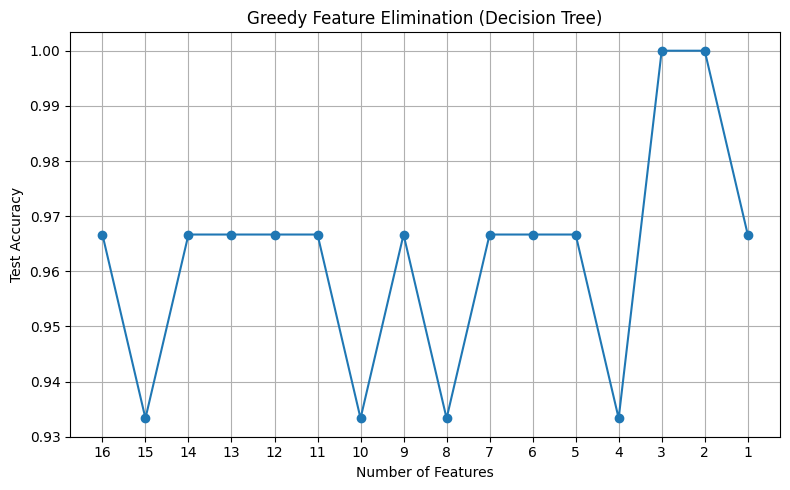

In [62]:
plt.figure(figsize=(8, 5))
plt.plot(r, accuracies_4, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Test Accuracy')
plt.title('Greedy Feature Elimination (Decision Tree)')
plt.gca().invert_xaxis()
plt.grid(True)
plt.xticks(range(min(r), max(r) + 1, 1))
plt.tight_layout()
plt.show()

In [63]:
features_4[2]

,feature
0,kurtosis
1,skewness


In [64]:
features_4[3]

,feature
0,kurtosis
1,skewness
2,mean
